# Домашнее задание по теме «Основные библиотеки: MatplotLib / Seaborn / Plotly»

## Импорт модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Задача 1

Сформируем массивы данных.

In [2]:
x = np.arange(0, 4.01, 0.01)
y = np.cos(20 * x) / (x + 0.1)

Построим график с помощью matplotlib.

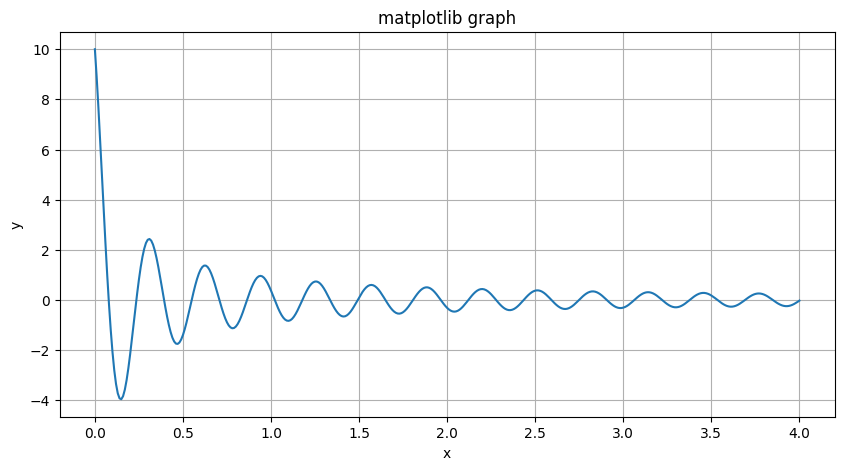

In [3]:
def show_with_matplotlib(x, y, title, figsize=(10, 5)):
    _, ax = plt.subplots(figsize=figsize)

    ax.plot(x, y)
    ax.set(xlabel="x", ylabel="y", title=title)
    ax.grid(True)

    plt.show()


show_with_matplotlib(x, y, "matplotlib graph")

Построим график с помощью seaborn.

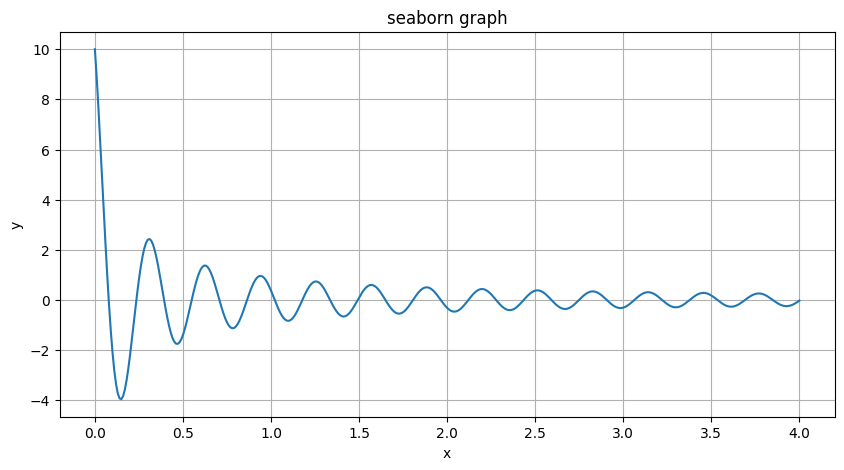

In [4]:
def show_with_seaborn(x, y, title, figsize=(10, 5)):
    _, ax = plt.subplots(figsize=figsize)

    sns.lineplot(data={"x": x, "y": y}, x="x", y="y")
    ax.set_title(title)
    ax.grid(True)

    plt.show()


show_with_seaborn(x, y, "seaborn graph")

Построим график с помощью plotly.

In [5]:
def show_with_plotly(x, y, title, figsize=(900, 450)):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode="lines"))

    fig.update_layout(
        title=title,
        xaxis_title="x",
        yaxis_title="y",
        width=figsize[0],
        height=figsize[1],
    )

    fig.show()


show_with_plotly(x, y, "plotly_graph")

## Задача 2

Загрузим набор данных и построим графики с помощью библиотеки plotly.

In [6]:
df = pd.read_csv("./car_data.csv")

df.head()

,Unnamed: 0,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


С использованием диаграммы box plot визуализируем зависимость
цены от марки автомобиля.

In [7]:
fig = px.box(
    df, x="Price ($)", y="Company", title="Price vs Company", width=800, height=800
)
fig.add_vline(
    x=df["Price ($)"].median(),
    annotation_text="Median Price ($)",
    line=dict(color="black", dash="dash", width=2),
)

fig.show()

На полученных графиках box plot видно, что наибольшая медианная цена у таких автомобилей как Cadillac, Saab, Honda, а наименьшая у Hyundai, Jaguar, Jeep, что говорит о специфических предпочтениях жителей США.

Построим scatter plot для дохода семьи и стоимости автомобиля,
отметим разными цветами гендер человека.

In [8]:
fig = px.scatter(
    df,
    x="Annual Income",
    y="Price ($)",
    color="Gender",
    title="Annual Income vs Price",
    width=800,
    height=800,
)
fig.add_vline(
    x=df["Annual Income"].median(),
    annotation_text="Median Income ($)",
    line=dict(color="black", dash="dash", width=2),
)

fig.show()

На графике scatter plot можно видеть, что основная масса автомобилей имеет цену до 50k долларов. Имтересно отметить, что семьи с доходом более 3M долларов чаще всего выбирают недорогие автомобили ценой до 30k.

Построим диаграмму count plot для типа кузова автомобиля и его цвета.

In [9]:
fig = px.histogram(
    df,
    x="Body Style",
    color="Color",
    barmode="group",
    title="Cars Number by Body Style and Color",
    width=800,
    height=600,
)

fig.show()

На count plot можно заметить, что наиболее распространенными типами кузова являются SUV и Hatchback, а наиболее распространенным цветом для всех автомобилей Pale White. Интересно отметить, что кузов Passenger, в отличие от остальных, не имеет преимущественного цвета (его цвета имеют практически равномерное распределение), в то время как у остальных преимущественный цвет Pale White.

## Задача 3

Загрузим и отобразим фотографию в полноцветном варианте
(RGB) и в градациях серого (grayscale) с помощью библиотеки matplotlib.

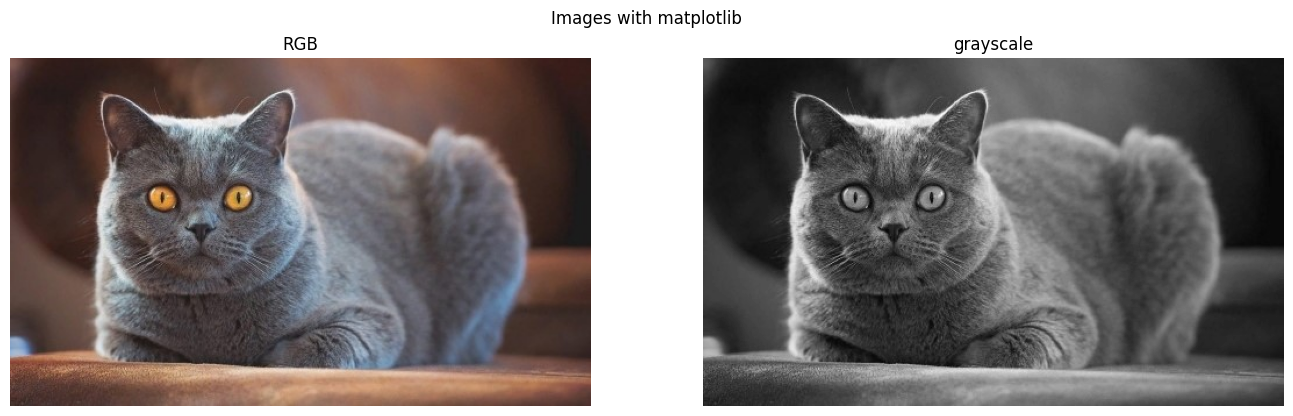

In [10]:
def show_images_with_matplotlib(path_to_image, title, figsize=(14, 4.2)):
    image = plt.imread(path_to_image)
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(title)

    ax[0].imshow(image)
    ax[0].axis("off")
    ax[0].set_title("RGB")

    ax[1].imshow(image.mean(axis=2), cmap="gray")
    ax[1].axis("off")
    ax[1].set_title("grayscale")

    plt.tight_layout()
    plt.show()


show_images_with_matplotlib("./cat.jpg", "Images with matplotlib")